## Hoeffding Inequality

Run a Computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently 10 times. Focus on 3 coins as follows: $c_1$ is the first coin flipped, $c_{\text{rand}}$ is a coin chosen randomly from the 1,000, and $c_{\text{min}}$ is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_1$, $v_{\text{rand}}$, and $v_{\text{min}}$ be the <em>fraction</em> of heads obtained for the 3 respective coins out of the 10 tosses.

Run the experiment 100,000 times in order to get a full distribution of $v_1$, $v_{\text{rand}}$, and $v_{\text{min}}$ (note that $c_{\text{rand}}$ and $c_{\text{min}}$ will change from run to run).

___

*We want to run this experiment, but first let's bring up some helpful definitions:*

**Random Variable** (http://mathworld.wolfram.com/RandomVariable.html)

A random variable is a measurable function from a probability space (S,S,P) into a measurable space (S^',S^') known as the state space (Doob 1996). Papoulis (1984, p. 88) gives the slightly different definition of a random variable X as a real function whose domain is the probability space S and such that:

1. The set {X<=x} is an event for any real number x.

2. The probability of the events {X=+infty} and {X=-infty} equals zero.

The abbreviation "r.v." is sometimes used to denote a random variable.

___

Each $c_\text{i}$ and $v_\text{i}$ are random variables. To be more specific it is the number of heads that come up for 10 coin tosses. Assuming the coin is fair the chances to land on a head is the same to land on a tail, $1/2$. Let us simulate this random variable with some cute Python code.

In [16]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Simulate a single random variable, number of heads on 10 coin flips
np.random.randint(0,2,10).sum()

7

In [30]:
# Simulate 1000 random variables described above
X = np.random.randint(0,2, (10,10000))
X

array([[0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [31]:
# Sum the random variables to find our frequency and develop a distribution
Y = X.sum(axis=0)
Y

array([3, 3, 5, ..., 6, 4, 4])

In [33]:
Y.argmin(), Y[Y.argmin()] # print the place of the minimum, and proof it is the minimum EX: Place 770

(4, 0)

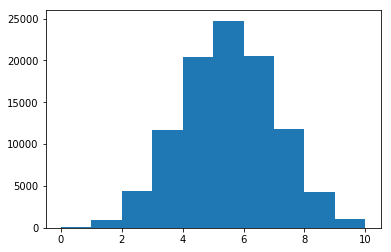

In [38]:
D = plt.hist(Y) # Distribution of one single r.v.

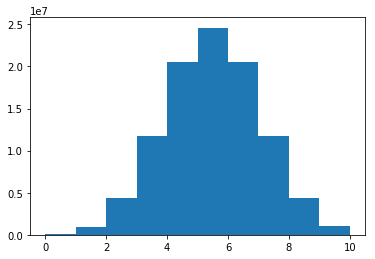

In [39]:
D_1 = plt.hist(np.random.randint(0,2, (10,100000000)).sum(axis=0)) # Run 100,000 trials of 1000 flips = 1mill flips 
#V_1:

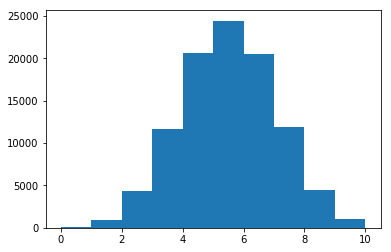

In [52]:
R = [] # create an empty list
for i in range(100000): # Repeat the experiment for 100,000 trials
    R.append(np.random.randint(0,2, (10,1000)).sum(axis=0)[np.random.randint(0,1000)])
D_r = plt.hist(R) # Map the distribution
#V_min:

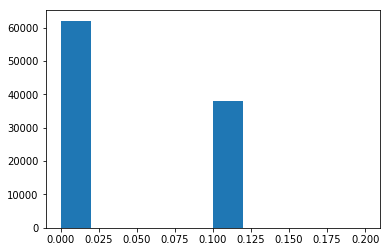

In [75]:
U = [] # create an empty list
for i in range(100000): # Repeat the experiment for 100,000 trials
    # U.append(np.random.randint(0,2, (10,1000)).sum(axis=0).argmin()) # Misunderstood assignment
    U.append(np.random.randint(0,2, (10,1000)).sum(axis=0).min()/10)
D_min = plt.hist(U) # Map the distribution
#V_min:

In [76]:
A = np.array(U)
A.mean() # The average of V_min

0.037889000000000006

* The average value of $v_\text{min}$ is closest to:

    [a] 0
    
    [b] 0.01
    
    [c] 0.1
    
    [d] 0.5
    
    [e] 0.67

* Which coin(s) has a distribution of $v$ that satisfies the (single-bin) Hoeffding Inequality?

    [a] $c_1$ only
    
    [b] $c_\text{rand}$ only
    
    [c] $c_\text{min}$ only
    
    [d] $c_1$ and $c_\text{rand}$
    
    [e] $c_\text{min}$ and $c_\text{rand}